In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import re

In [12]:
os.makedirs('plots', exist_ok=True)

In [2]:
with open("train_logs/tcn/2022-02-04T130431/tcn_0.0003_100classes_log.txt", "r") as f:
    file = f.readlines()
print(file)

['Model has been successfully loaded from models/lrw_resnet18_mstcn_adamw_s3.pth.tar\n', '----------\n', 'Epoch 0/79\n', 'Current learning rate: 0.0003\n', '[   16/13000 (0%)]\tLoss: 4.6656\tAcc:0.0000\tCost time:6.861 (6.861)s\tData time:2.881 (2.881)\tInstances per second: 2.33\n', '[  816/13000 (6%)]\tLoss: 4.5251\tAcc:0.0385\tCost time:0.247 (0.449)s\tData time:0.009 (0.065)\tInstances per second: 35.61\n', '[ 1616/13000 (12%)]\tLoss: 4.3024\tAcc:0.1033\tCost time:0.260 (0.383)s\tData time:0.009 (0.037)\tInstances per second: 41.76\n', '[ 2416/13000 (18%)]\tLoss: 3.9345\tAcc:0.1782\tCost time:0.458 (0.353)s\tData time:0.221 (0.042)\tInstances per second: 45.28\n', '[ 3216/13000 (25%)]\tLoss: 3.4983\tAcc:0.2706\tCost time:0.264 (0.350)s\tData time:0.008 (0.037)\tInstances per second: 45.73\n', '[ 4016/13000 (31%)]\tLoss: 3.1675\tAcc:0.3491\tCost time:0.249 (0.343)s\tData time:0.008 (0.044)\tInstances per second: 46.65\n', '[ 4816/13000 (37%)]\tLoss: 2.8928\tAcc:0.4117\tCost time:0.4

In [3]:
validation = []
for line in file:
    if 'val' in line:
        validation.append(line)
    
print(len(validation))

80


In [4]:
import re
sample = validation[0]
RE = re.findall('\d[.\d]*', sample)
print(RE)

['0', '0.5523', '0.8582', '0.0003']


In [5]:
val_loss = []
val_acc = []

for val in validation:
    numbers = re.findall('\d[.\d]*', val)
    val_loss.append(eval(numbers[1]))
    val_acc.append(eval(numbers[2]))
    
print('val Loss', 'val Acc')
list(zip(val_loss, val_acc))

val Loss val Acc


[(0.5523, 0.8582),
 (0.507, 0.8562),
 (0.4936, 0.8689),
 (0.5013, 0.8816),
 (0.436, 0.8926),
 (0.37, 0.905),
 (0.4141, 0.899),
 (0.4871, 0.8769),
 (0.4836, 0.8789),
 (0.3643, 0.886),
 (0.4088, 0.897),
 (0.48, 0.8796),
 (0.4857, 0.8783),
 (0.4478, 0.8936),
 (0.4243, 0.895),
 (0.3917, 0.9047),
 (0.4149, 0.9067),
 (0.4115, 0.912),
 (0.4145, 0.899),
 (0.4478, 0.8936),
 (0.4149, 0.9043),
 (0.3889, 0.904),
 (0.4548, 0.8973),
 (0.3732, 0.9043),
 (0.4772, 0.8876),
 (0.4628, 0.8886),
 (0.4443, 0.8963),
 (0.4404, 0.8963),
 (0.4252, 0.9087),
 (0.5597, 0.8676),
 (0.4068, 0.8977),
 (0.5056, 0.8856),
 (0.4762, 0.8916),
 (0.399, 0.9037),
 (0.3461, 0.9137),
 (0.4543, 0.9027),
 (0.4969, 0.897),
 (0.3947, 0.904),
 (0.3618, 0.911),
 (0.412, 0.8983),
 (0.4074, 0.9033),
 (0.4394, 0.8926),
 (0.3178, 0.9261),
 (0.4075, 0.899),
 (0.4574, 0.886),
 (0.42, 0.8997),
 (0.3931, 0.9027),
 (0.4353, 0.889),
 (0.4285, 0.896),
 (0.3588, 0.9174),
 (0.3884, 0.8977),
 (0.3231, 0.9147),
 (0.4172, 0.898),
 (0.3787, 0.911),
 

In [6]:
train = []
for line in file:
    if '100%' in line:
        train.append(line)
    
print(len(train))

80


In [7]:
train_loss = []
train_acc = []

for t in train:
    numbers = re.findall('\d[.\d]*', t)
    train_loss.append(eval(numbers[3]))
    train_acc.append(eval(numbers[4]))
    
print('train Loss', 'train Acc')
list(zip(train_loss, train_acc))

train Loss train Acc


[(1.9544, 0.633),
 (1.2098, 0.7988),
 (1.0825, 0.8112),
 (1.0095, 0.8219),
 (0.96, 0.8237),
 (0.9741, 0.8161),
 (0.8779, 0.8335),
 (0.9112, 0.8208),
 (0.8556, 0.8267),
 (0.8825, 0.8137),
 (0.8398, 0.8197),
 (0.8679, 0.808),
 (0.8025, 0.8257),
 (0.7848, 0.8239),
 (0.7644, 0.8294),
 (0.7472, 0.8282),
 (0.7401, 0.825),
 (0.7267, 0.8261),
 (0.698, 0.8363),
 (0.7293, 0.8228),
 (0.7176, 0.8225),
 (0.6976, 0.8244),
 (0.7021, 0.8223),
 (0.6374, 0.8379),
 (0.6759, 0.8286),
 (0.6754, 0.8248),
 (0.6626, 0.8269),
 (0.6274, 0.8392),
 (0.6482, 0.8273),
 (0.6282, 0.8288),
 (0.6239, 0.8308),
 (0.6574, 0.8188),
 (0.5969, 0.8332),
 (0.5897, 0.8348),
 (0.6097, 0.8293),
 (0.5918, 0.8317),
 (0.5995, 0.8272),
 (0.5644, 0.8361),
 (0.5767, 0.8325),
 (0.5731, 0.8317),
 (0.5496, 0.8407),
 (0.5424, 0.8383),
 (0.524, 0.8463),
 (0.5613, 0.8274),
 (0.5355, 0.8401),
 (0.5522, 0.8295),
 (0.5575, 0.8276),
 (0.5359, 0.8317),
 (0.5142, 0.8403),
 (0.535, 0.8305),
 (0.552, 0.8196),
 (0.5282, 0.8267),
 (0.5268, 0.8266),
 (

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(np.array(range(80)), np.array(val_loss), label='Validation')
plt.plot(np.array(range(80)), np.array(train_loss), label='Train')
plt.legend()
plt.grid()
plt.title('Loss')
plt.savefig('LossPlot.jpg')
plt.show()

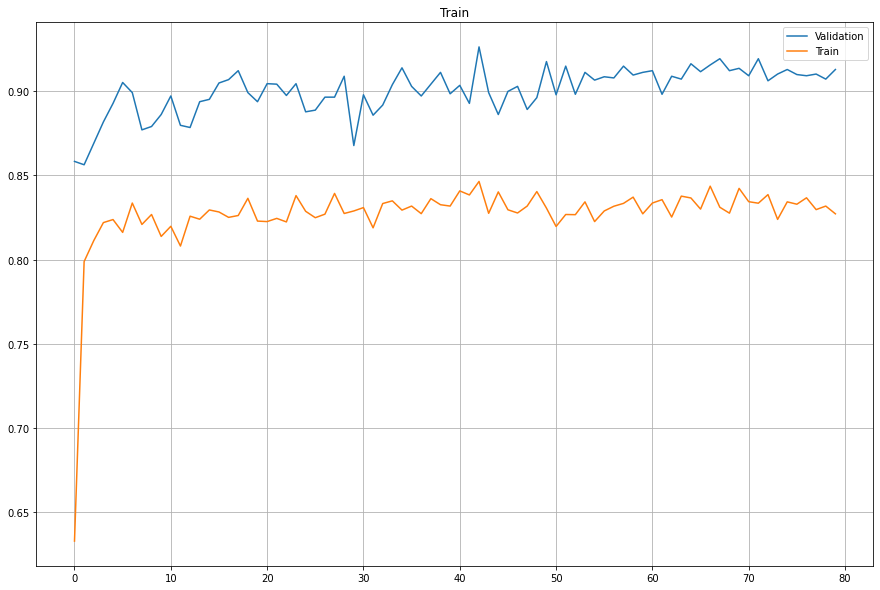

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(np.array(range(80)), np.array(val_acc), label = "Validation")
plt.plot(np.array(range(80)), np.array(train_acc), label = "Train")
plt.legend()
plt.grid()
plt.title('Train')
plt.savefig('TrainPlot.jpg')
plt.show()

#### 

In [16]:
def plot_results(text_file_path: str, title: str):
    with open(text_file_path, 'r') as f:
        file = f.readlines()
    
    validation = []
    for line in file:
        if 'val' in line:
            validation.append(line)
    
    val_loss = []
    val_acc = []

    for val in validation:
        numbers = re.findall('\d[.\d]*', val)
        val_loss.append(eval(numbers[1]))
        val_acc.append(eval(numbers[2]))
    
    train = []
    for line in file:
        if '100%' in line:
            train.append(line)
    
    train_loss = []
    train_acc = []

    for t in train:
        numbers = re.findall('\d[.\d]*', t)
        train_loss.append(eval(numbers[3]))
        train_acc.append(eval(numbers[4]))
    plt.figure(figsize=(15, 10), dpi=300)
    plt.plot(np.array(range(80)), np.array(val_loss), label='Validation')
    plt.plot(np.array(range(80)), np.array(train_loss), label='Train')
    plt.legend()
    plt.grid()
    plt.title(title + '_loss')
    plt.savefig(os.path.join('plots', title + '_loss' + '.jpg'))

    plt.figure(figsize=(15, 10))
    plt.plot(np.array(range(80)), np.array(val_acc), label = "Validation")
    plt.plot(np.array(range(80)), np.array(train_acc), label = "Train")
    plt.legend()
    plt.grid()
    plt.title(title + '_acc')
    plt.savefig(os.path.join('plots', title + '_acc' + '.jpg'))
    plt.show()

def find_text_file(folder_path: str):
    files = glob(os.path.join(folder_path, '*'))
    for file in files:
        if os.path.splitext(file)[-1] == '.txt':
            return file
    return None

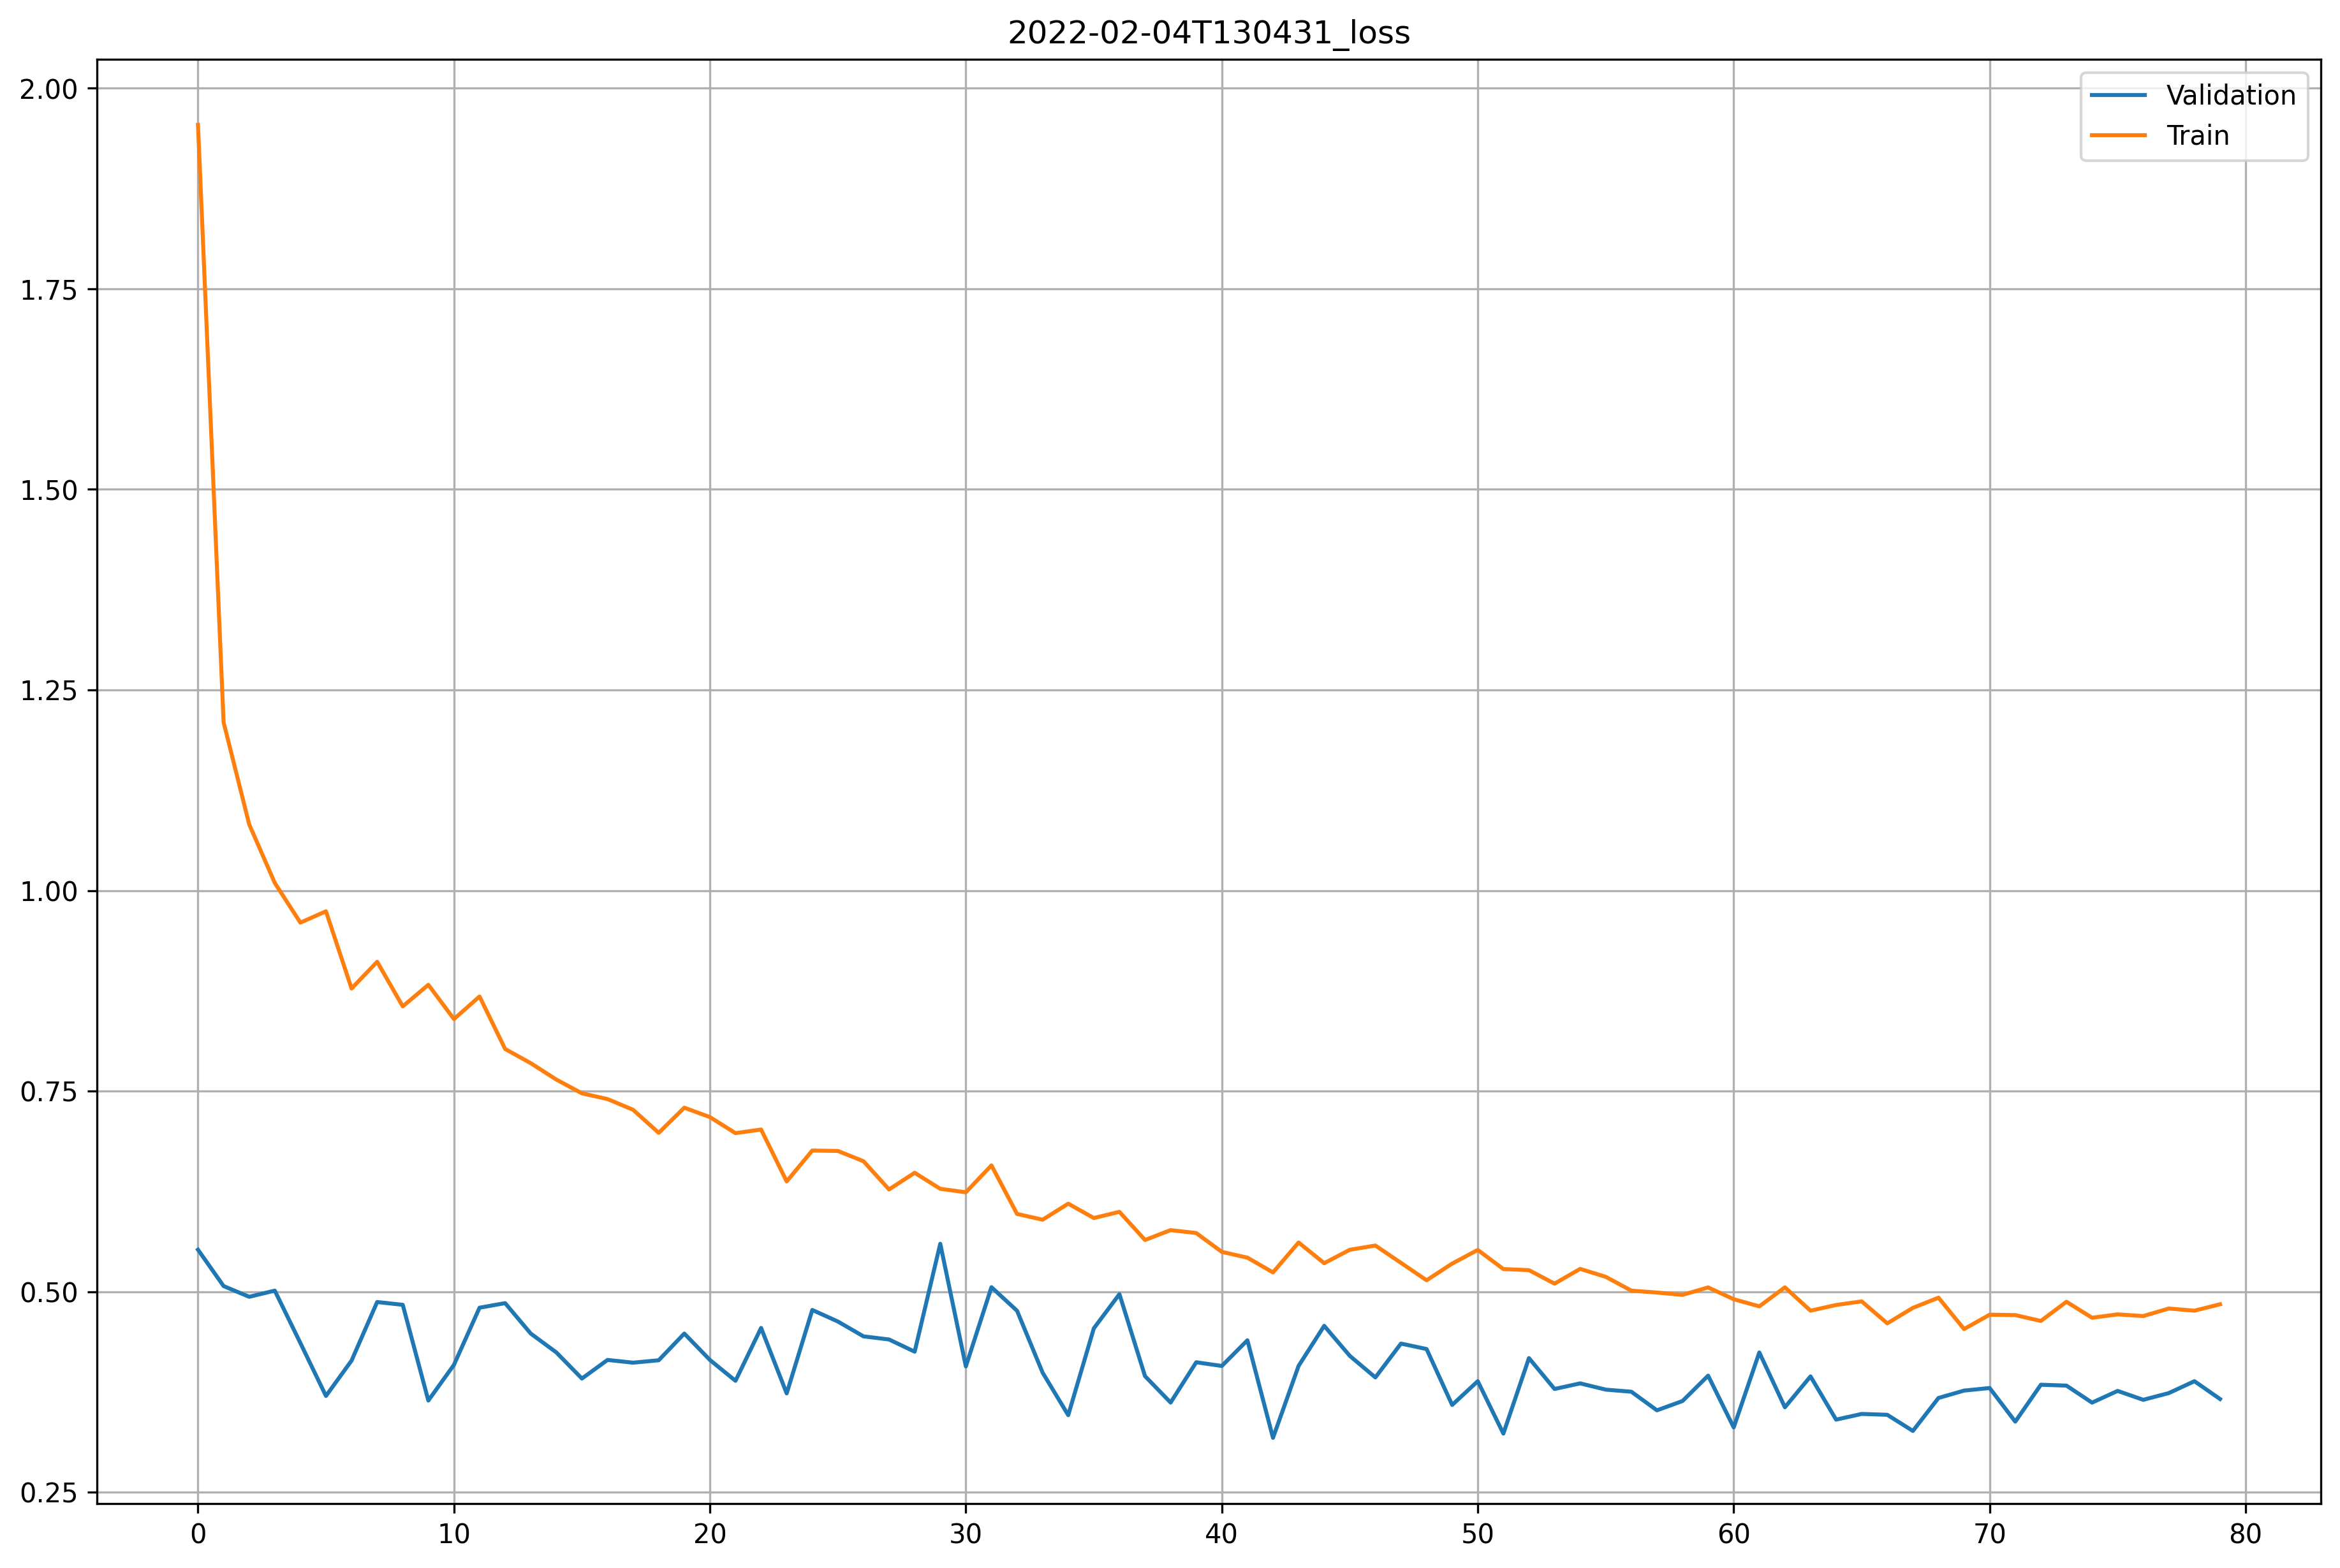

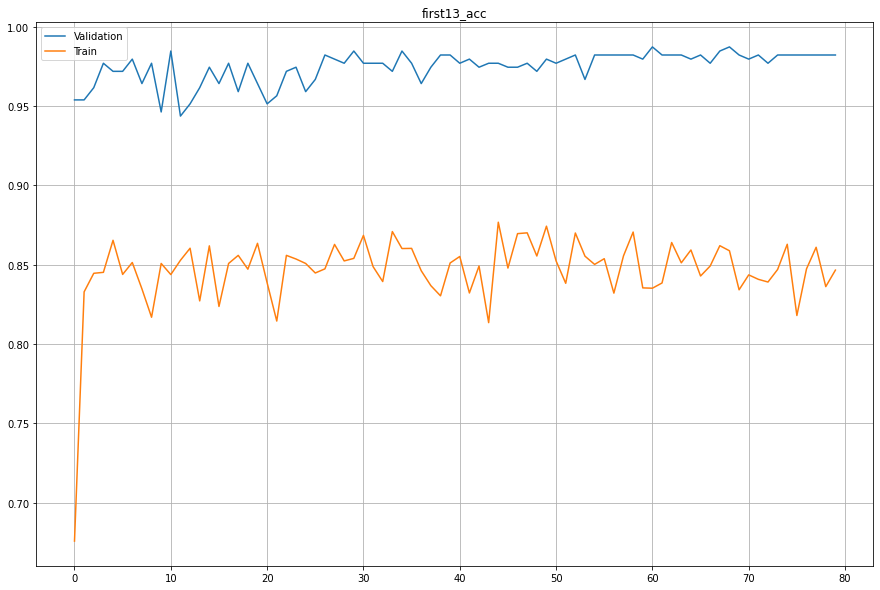

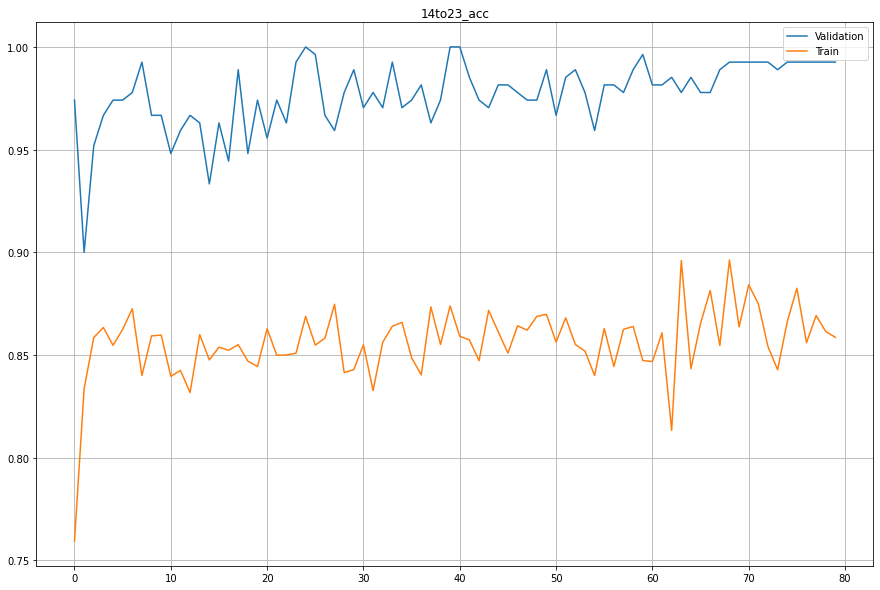

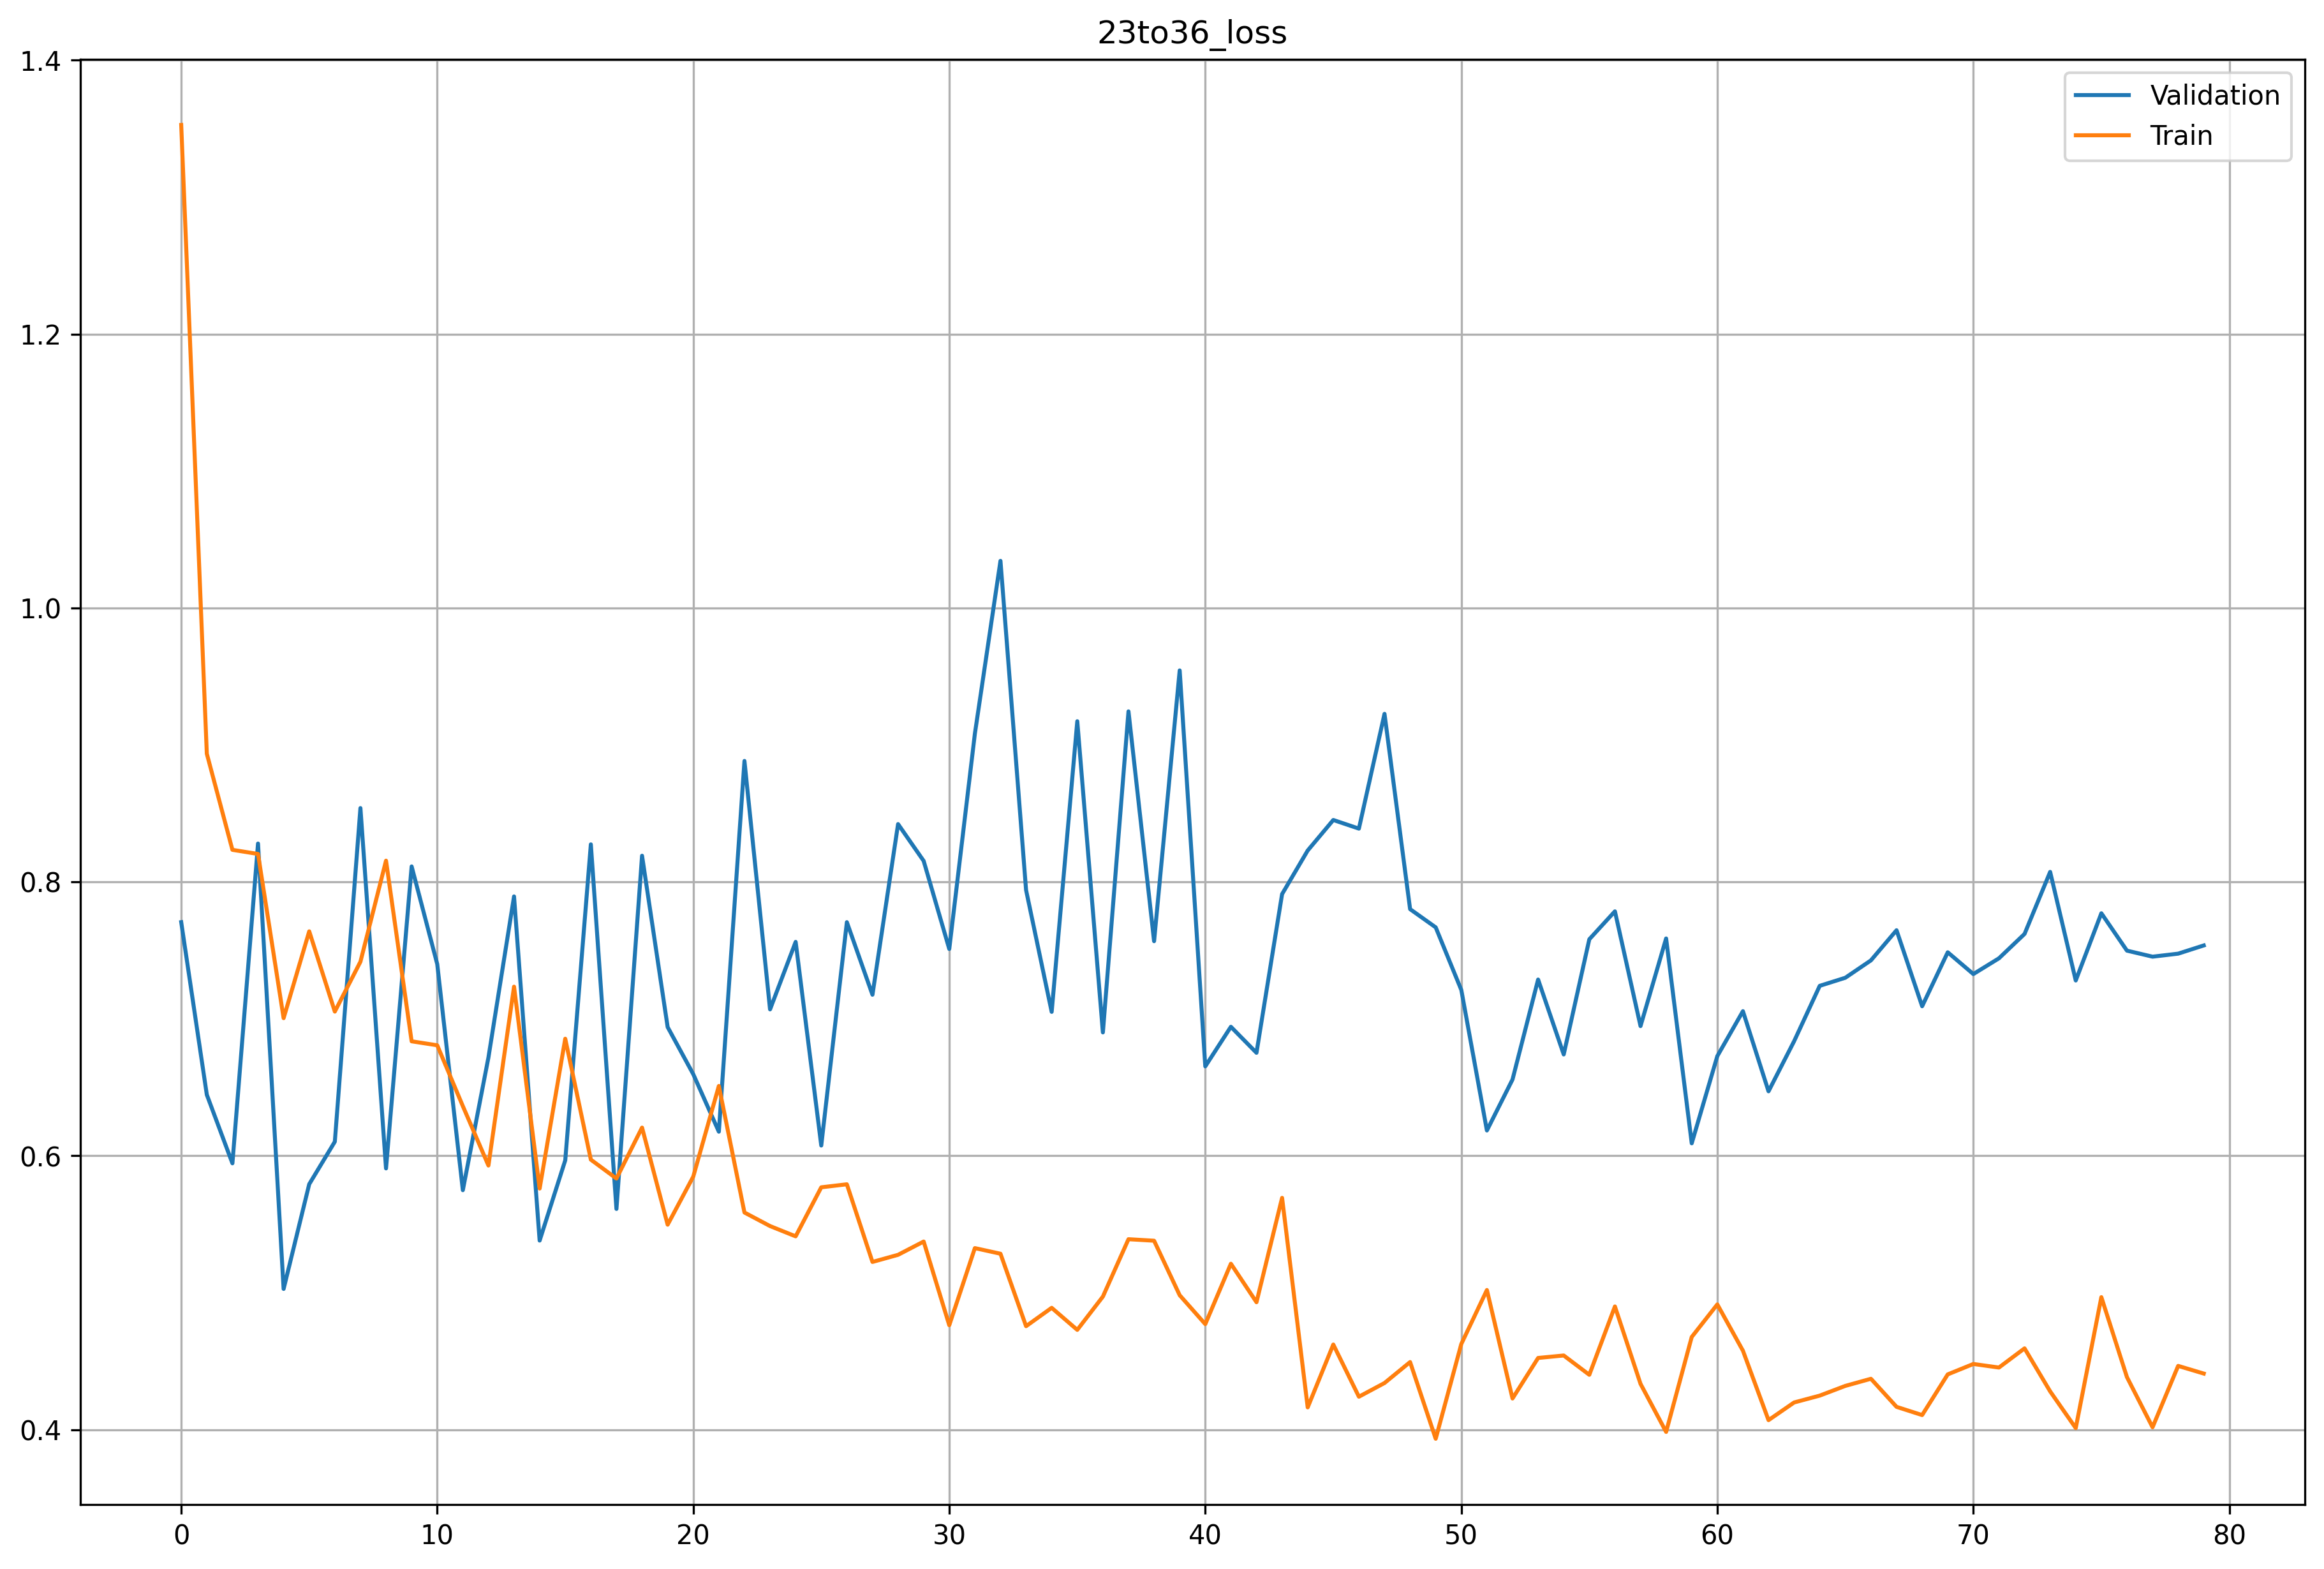

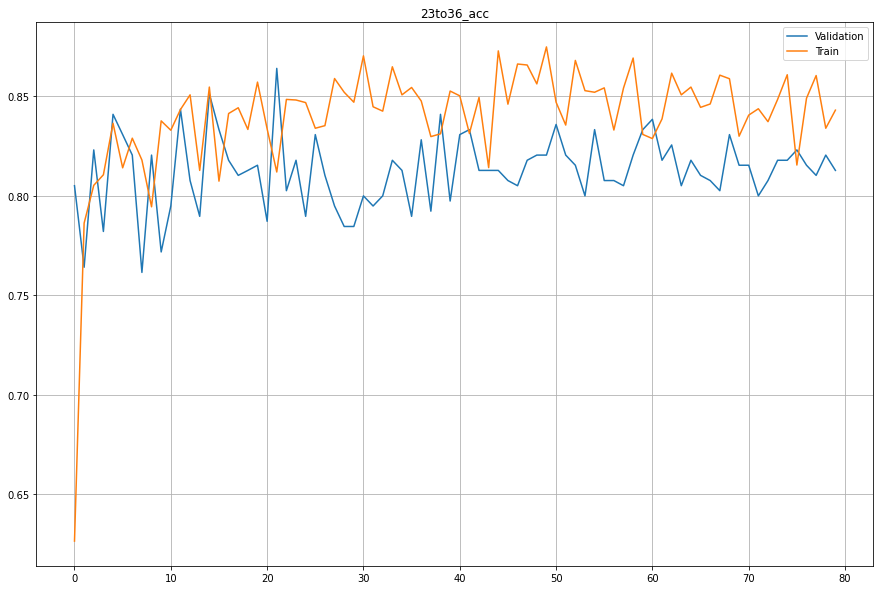

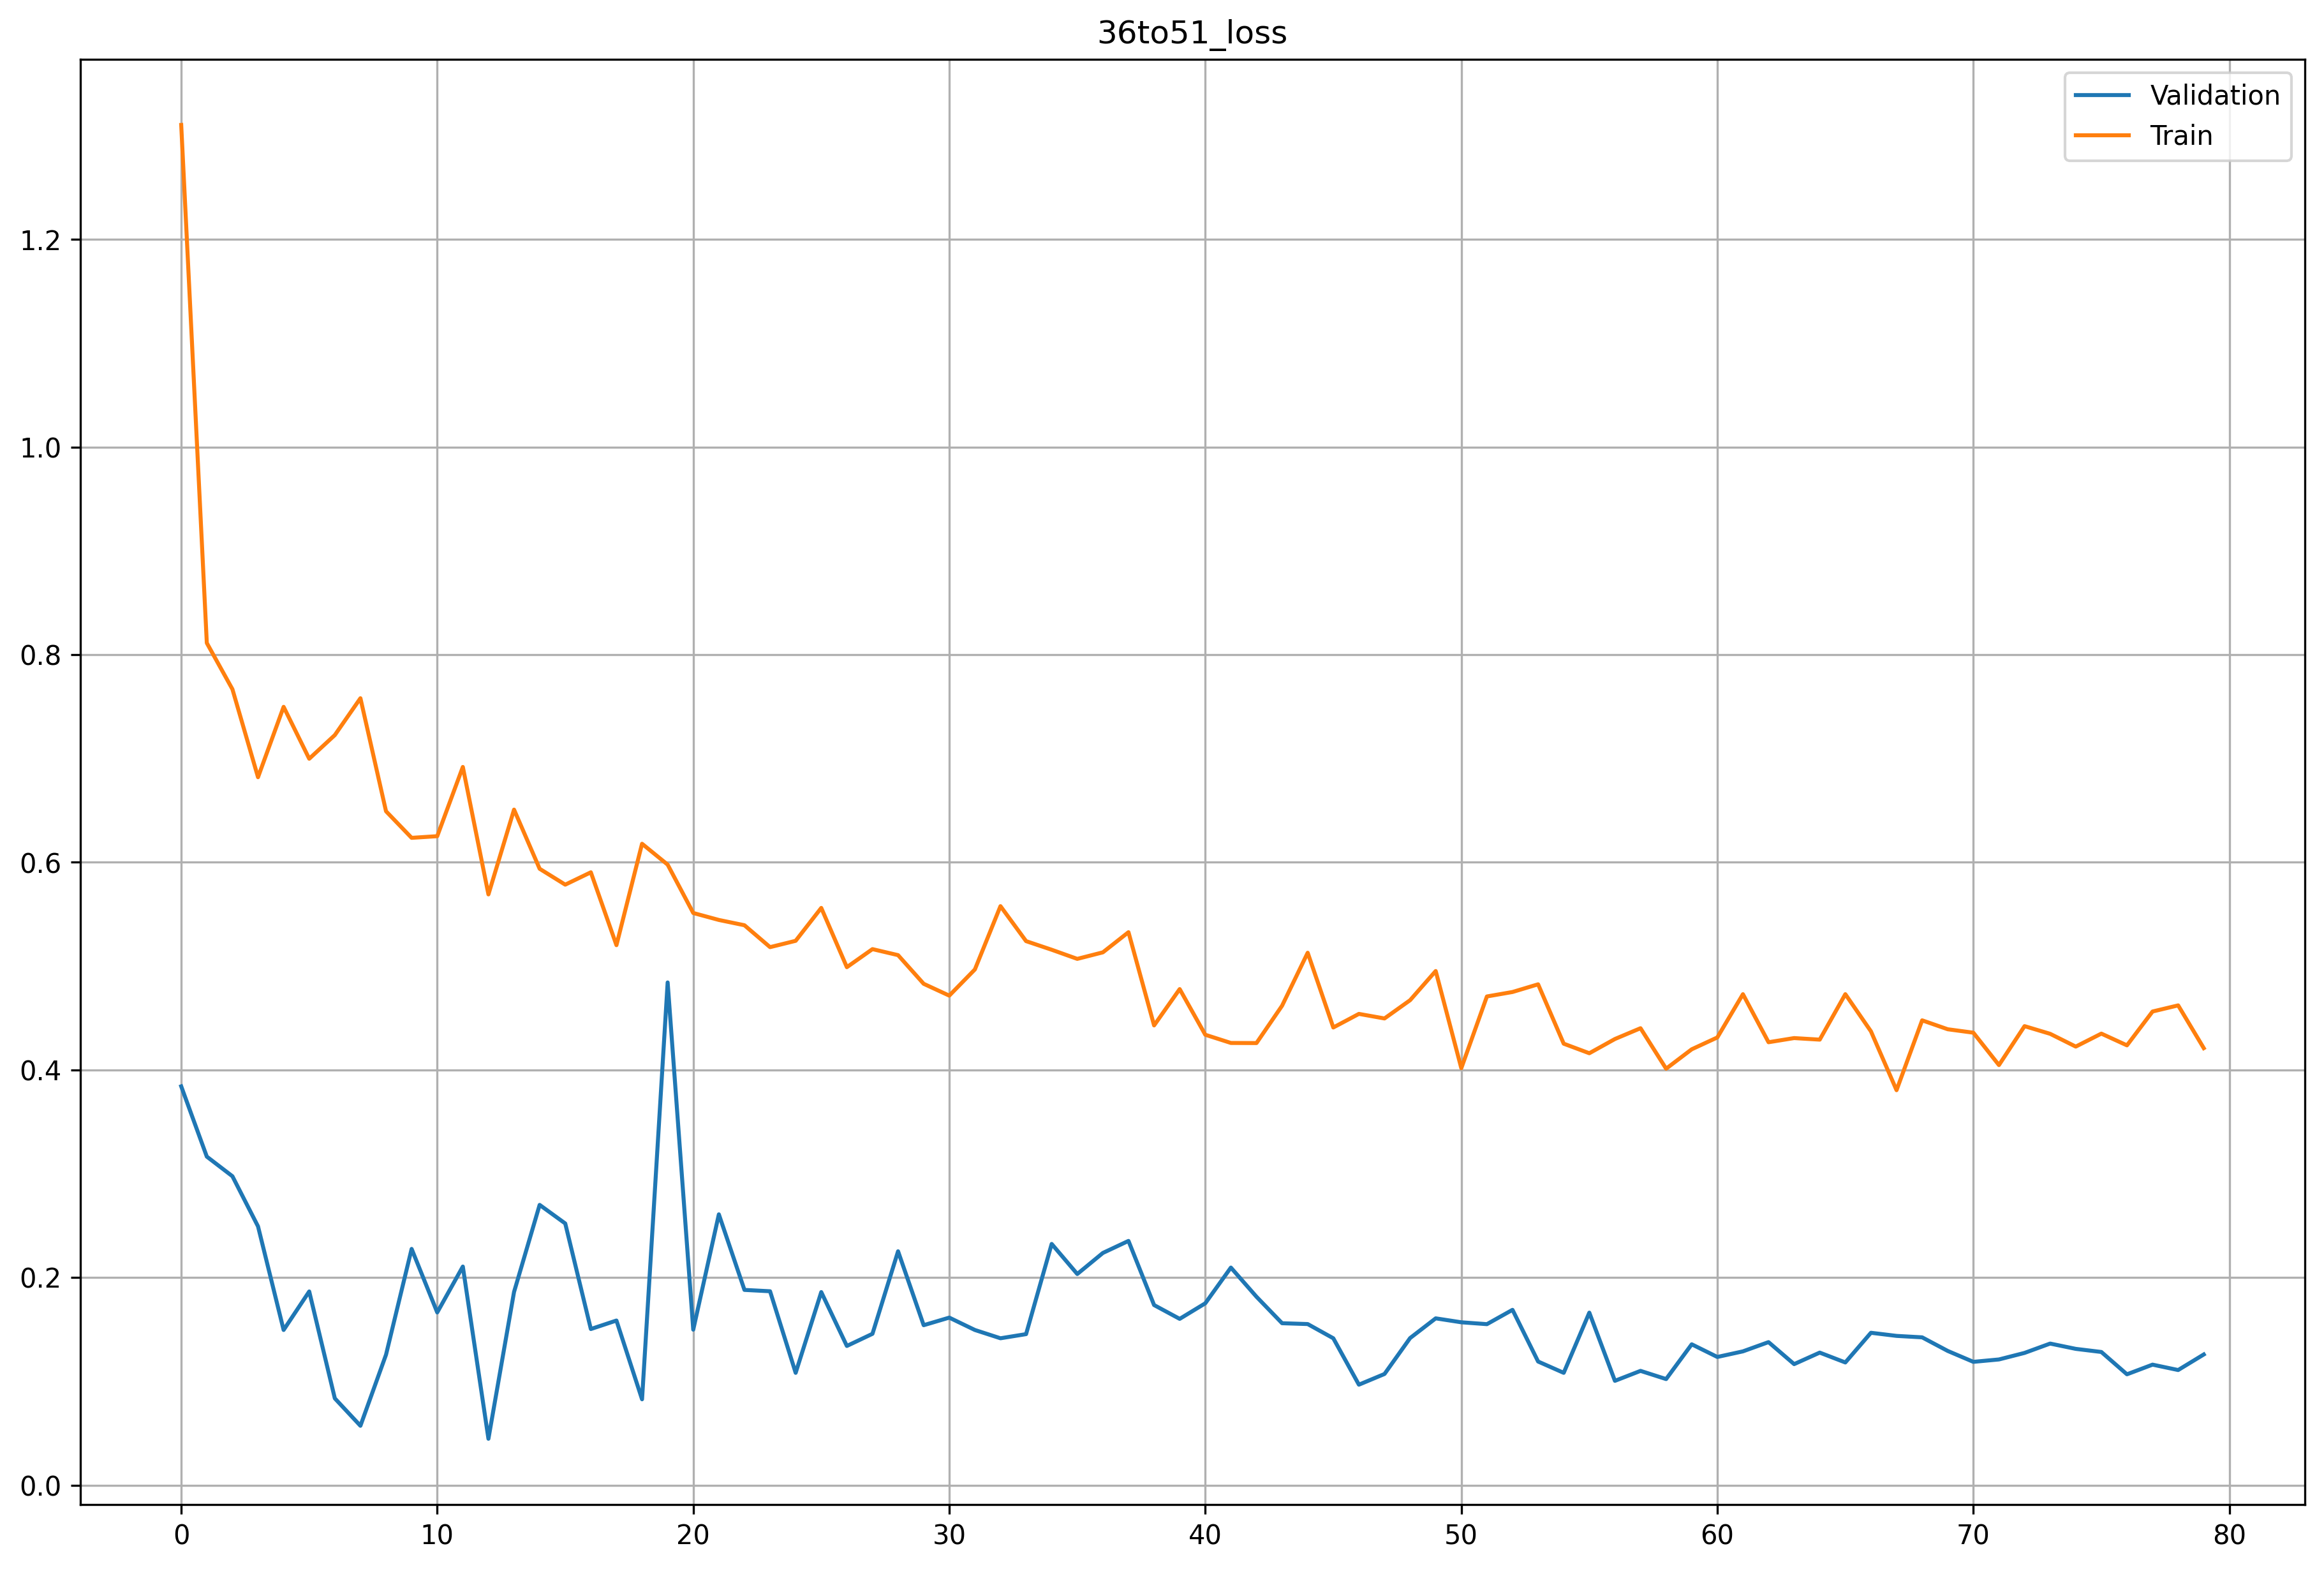

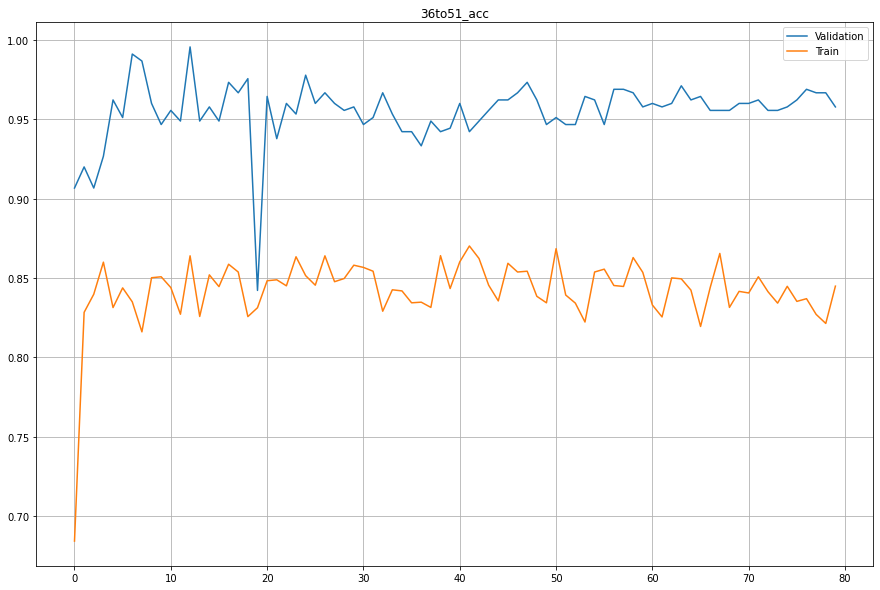

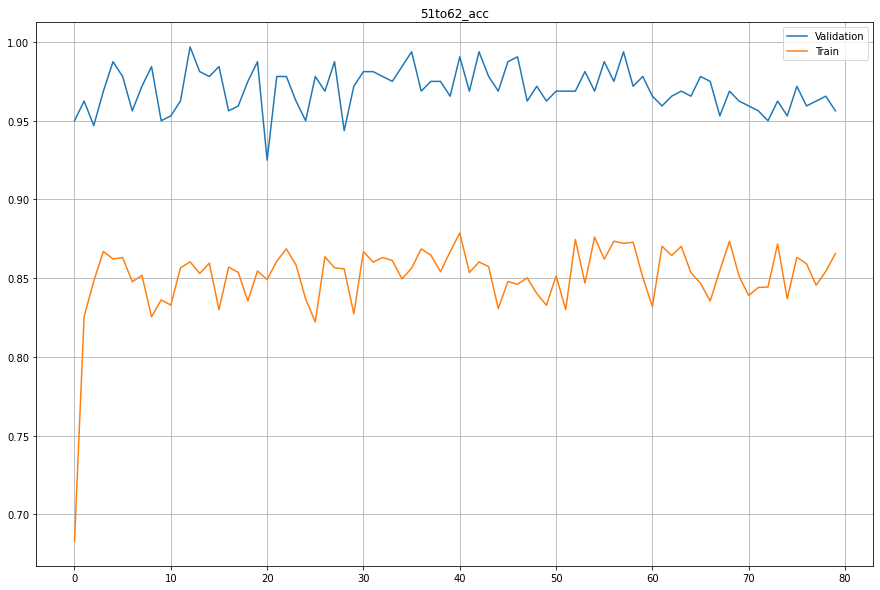

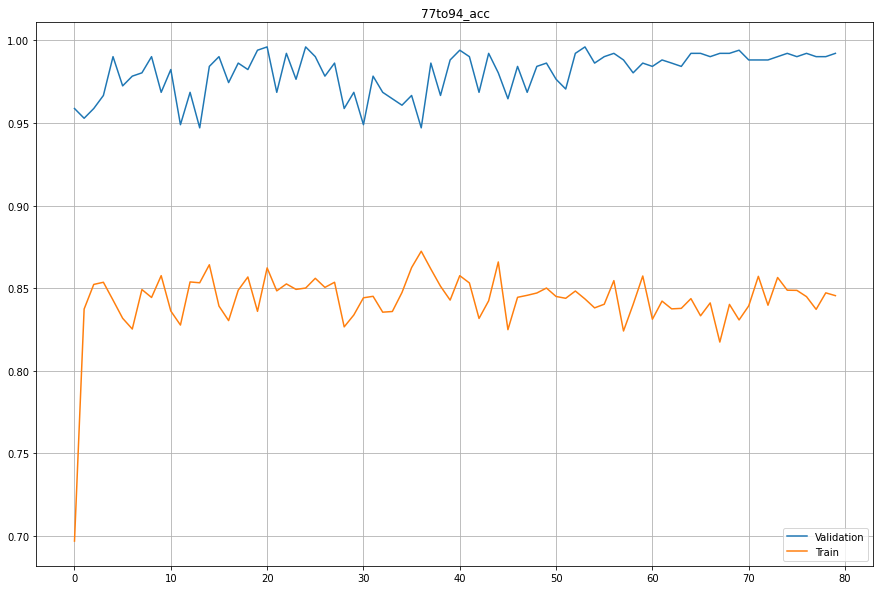

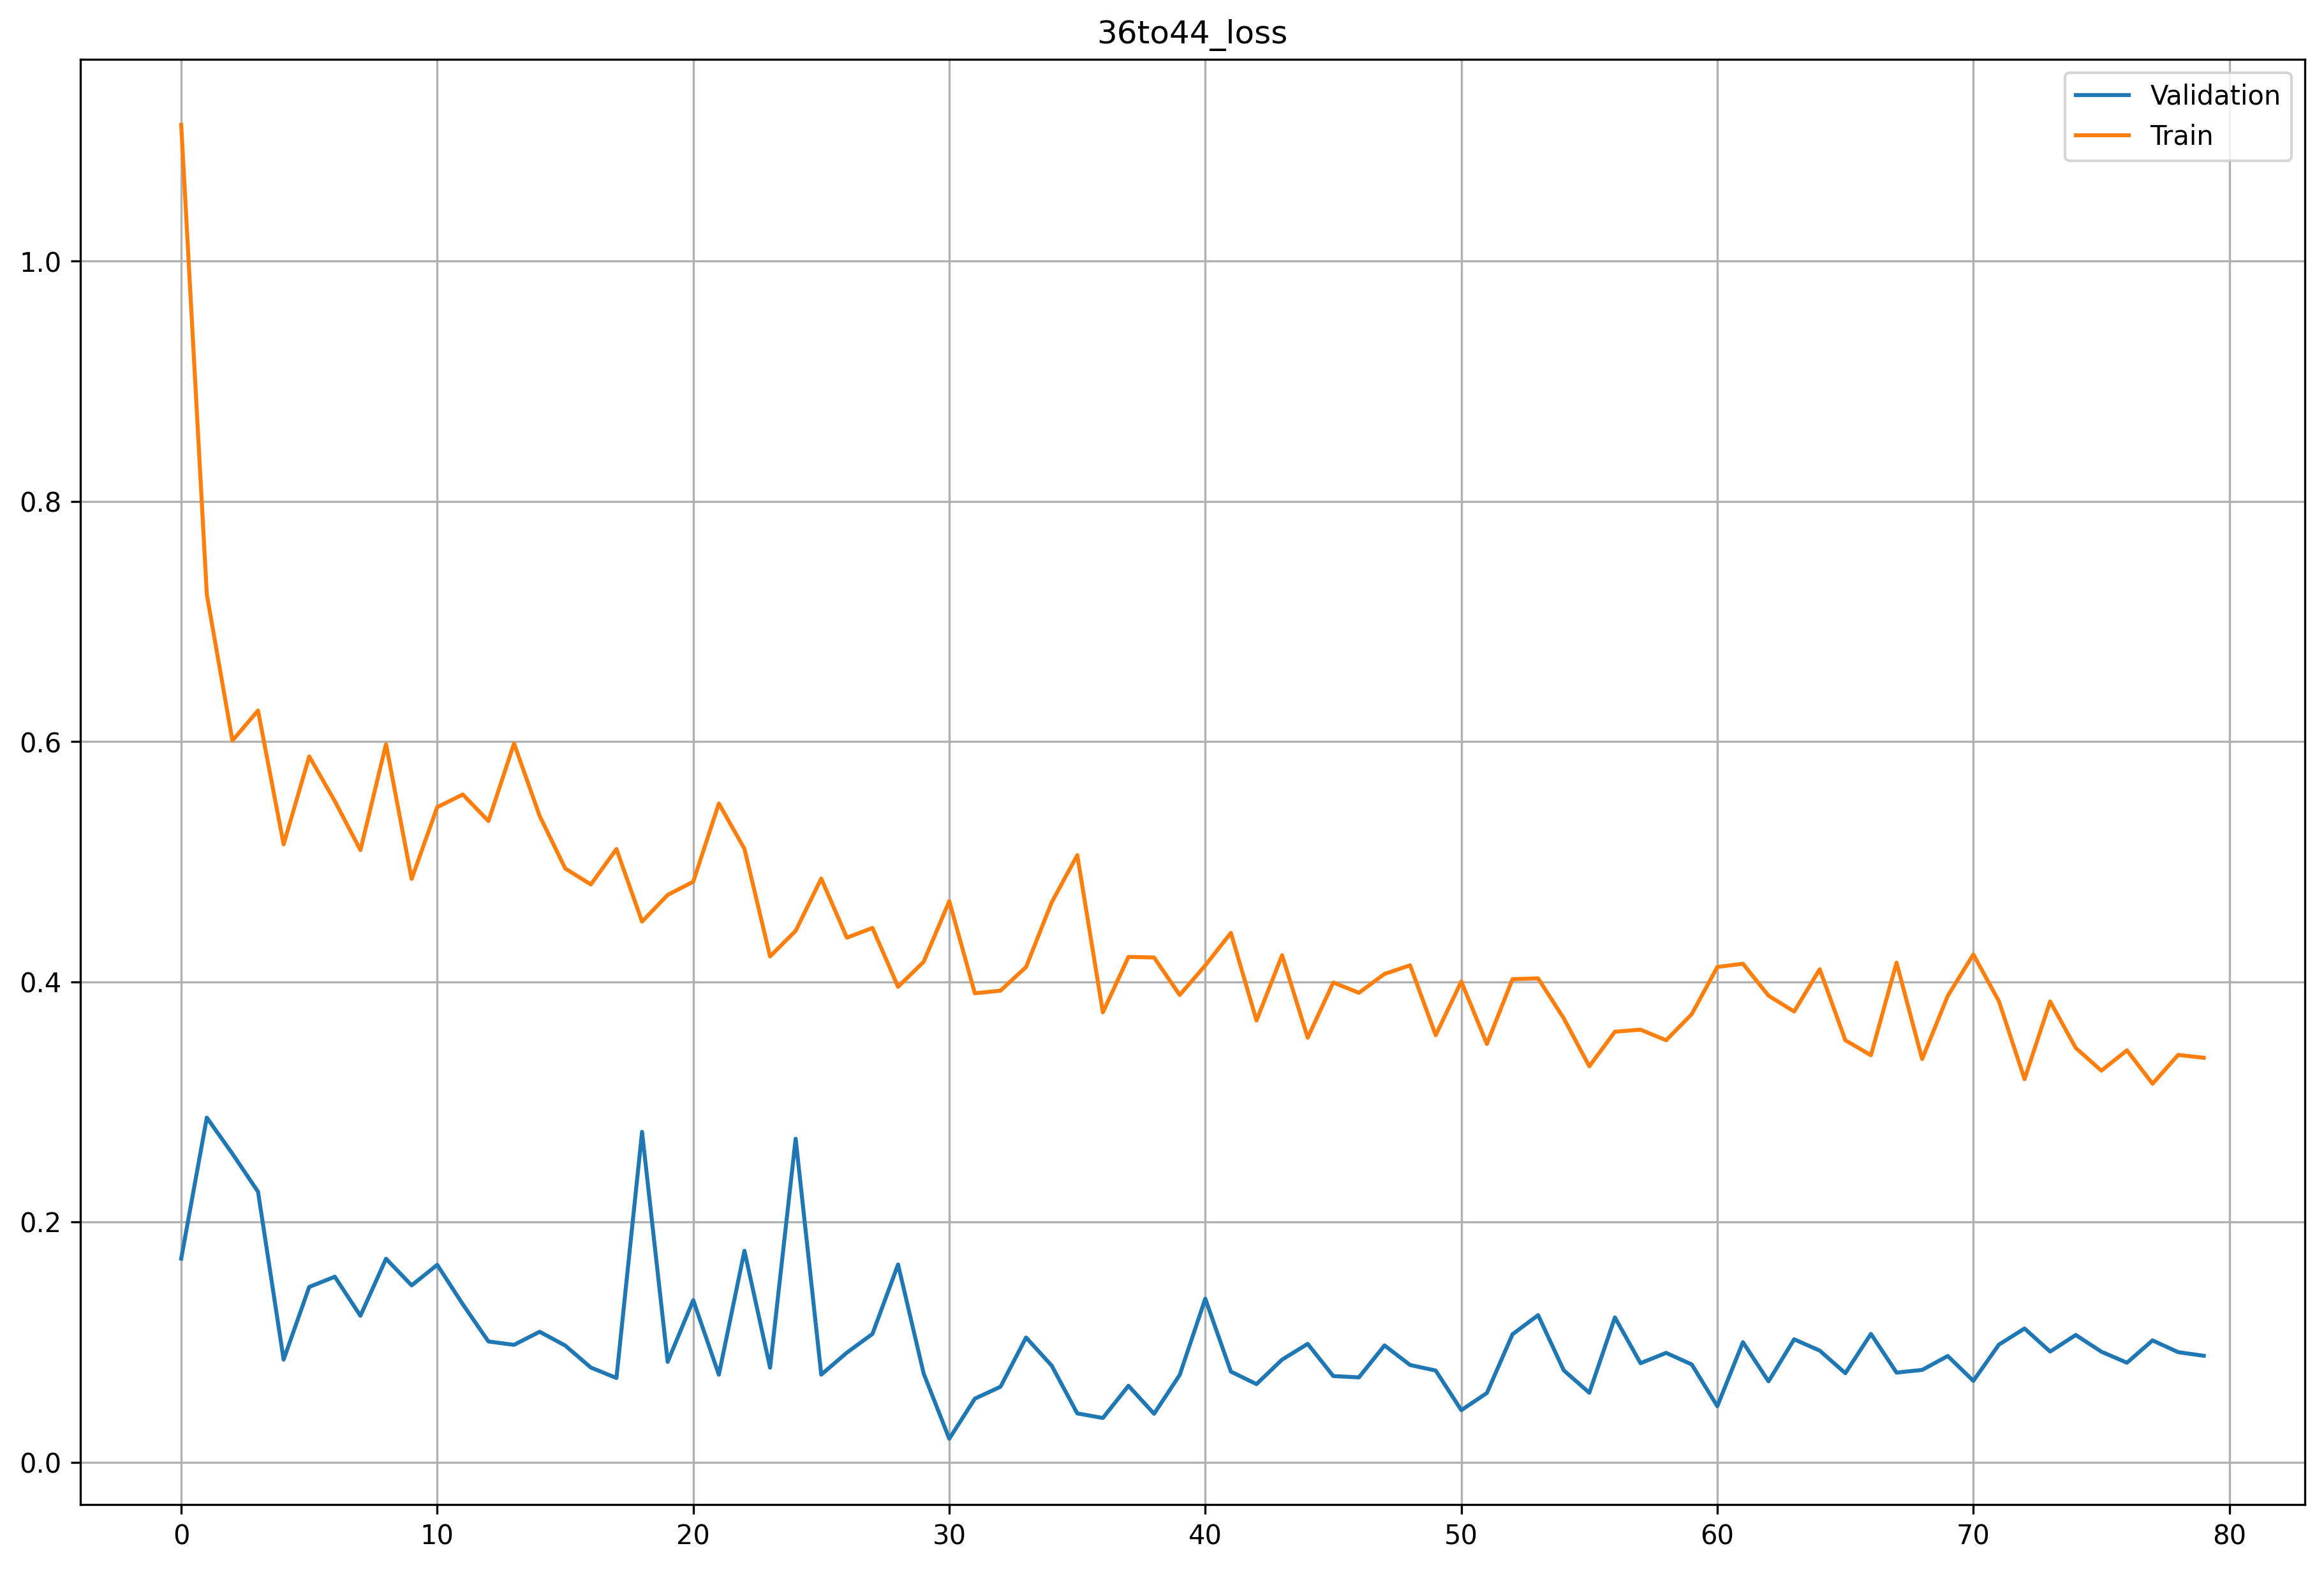

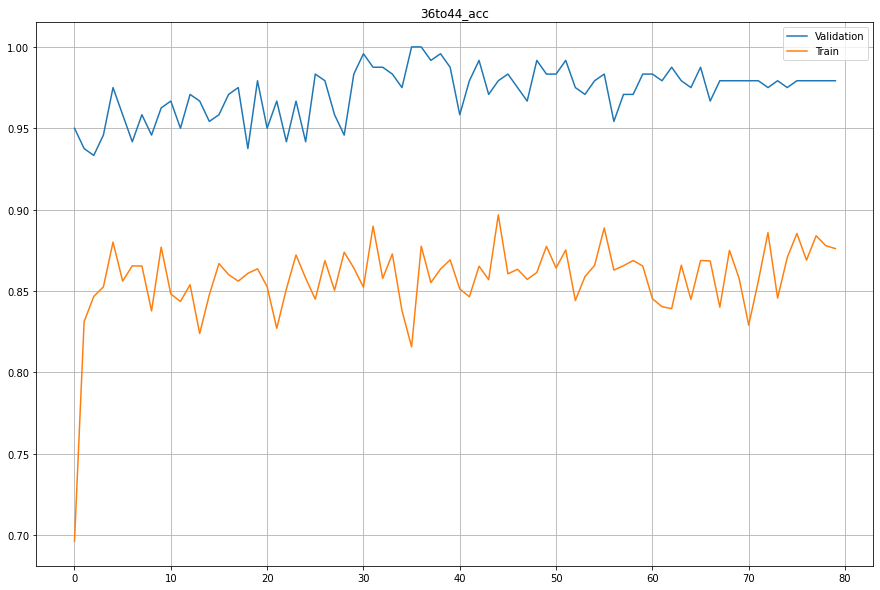

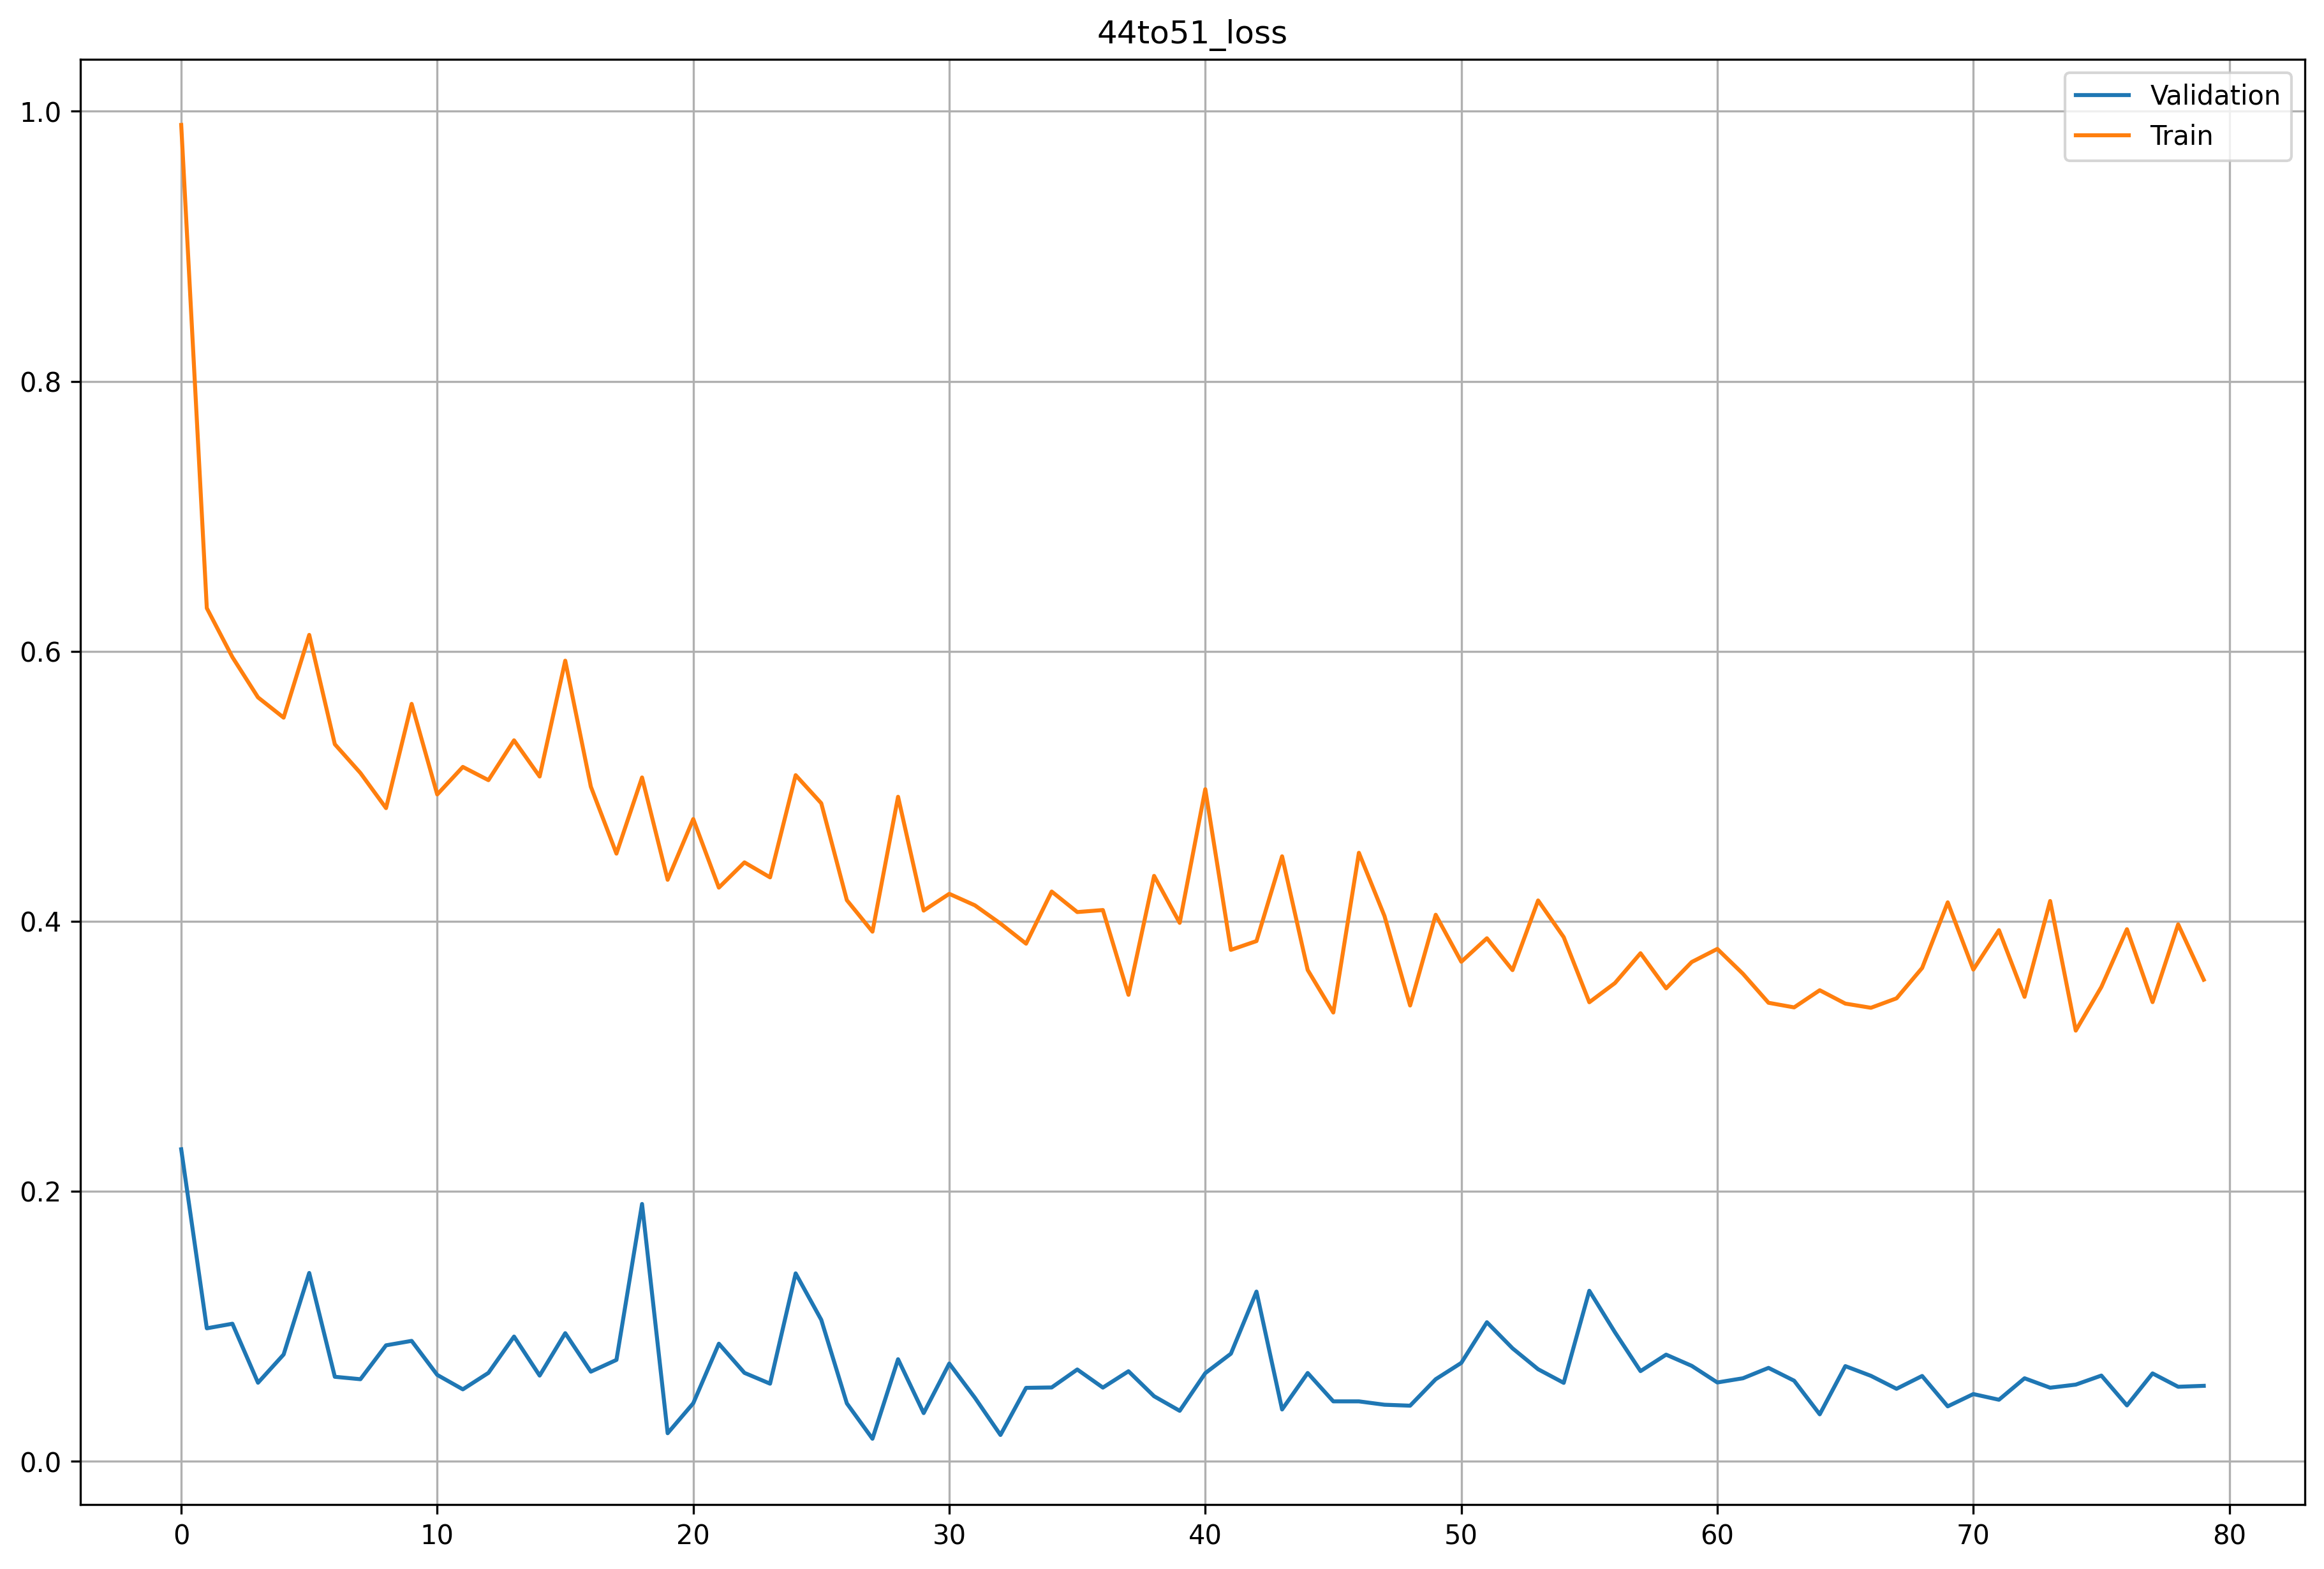

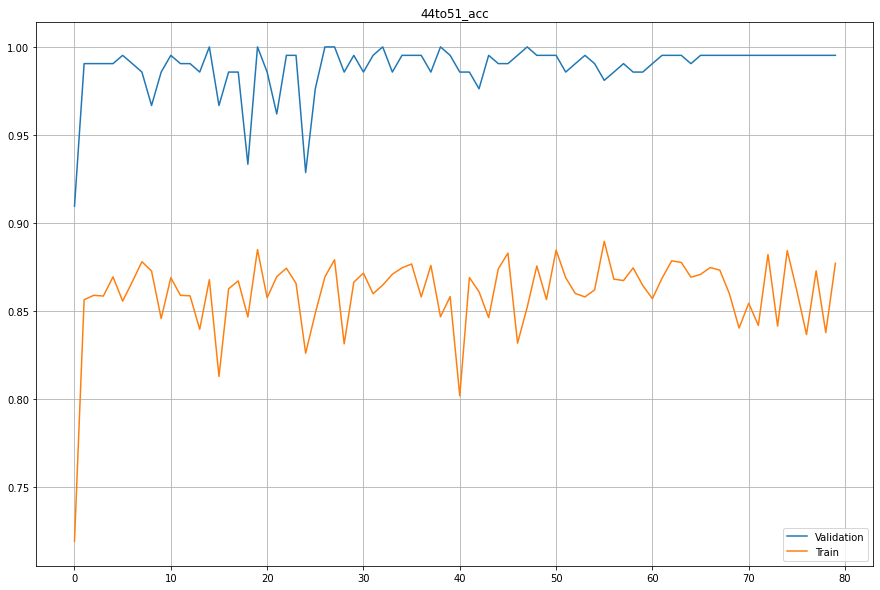

In [17]:
folders = glob('train_logs/tcn/*')
for folder in folders:
    file = find_text_file(folder)
    plot_results(file, os.path.basename(folder).split('_')[-1])